In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cols = ['Transaction','Customer','Date','Amount']
cus = pd.read_excel('C:/Users/Sherad/Python Scripts/Files/04_RFM.xlsx', sheet_name='RFM_initial',usecols=cols,skiprows=3)

In [5]:
cus.head()

,Transaction,Customer,Date,Amount
0,1,4184,2016-09-03,30
1,2,3657,2018-10-05,34
2,3,1011,2016-09-18,47
3,4,106,2015-06-08,94
4,5,739,2017-06-12,73


In [6]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Transaction  100000 non-null  int64         
 1   Customer     100000 non-null  int64         
 2   Date         100000 non-null  datetime64[ns]
 3   Amount       100000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


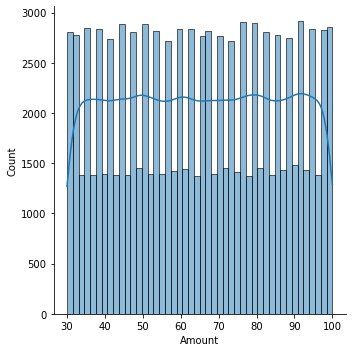

In [8]:
sns.displot(data = cus, x= 'Amount', kde = 'kind')

In [9]:
import datetime as dt

In [10]:
cus['month'] = cus['Date'].dt.month
cus['year'] = cus['Date'].dt.year

In [11]:
cus.head()

,Transaction,Customer,Date,Amount,month,year
0,1,4184,2016-09-03,30,9,2016
1,2,3657,2018-10-05,34,10,2018
2,3,1011,2016-09-18,47,9,2016
3,4,106,2015-06-08,94,6,2015
4,5,739,2017-06-12,73,6,2017


In [12]:
import calendar

In [13]:
cus['month_name'] = cus['month'].apply(lambda x: calendar.month_abbr[x])

In [16]:
monthly = cus.groupby(['month','month_name'],sort=True).sum()['Amount'].reset_index()
monthly

,month,month_name,Amount
0,1,Jan,574790
1,2,Feb,527885
2,3,Mar,582855
3,4,Apr,560105
4,5,May,577867
5,6,Jun,551181
6,7,Jul,576481
7,8,Aug,576811
8,9,Sep,553294
9,10,Oct,458773


<AxesSubplot:xlabel='month_name', ylabel='Amount'>

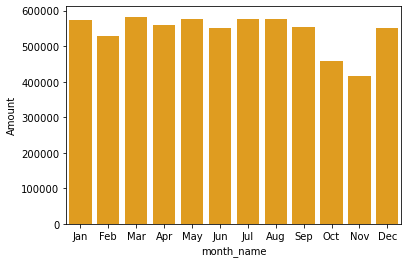

In [20]:
sns.barplot(data=monthly,x='month_name',y='Amount',color='Orange')

In [23]:
yearly = cus.groupby('year').sum()['Amount'].reset_index()
yearly

,year,Amount
0,2014,126863
1,2015,1690445
2,2016,1708252
3,2017,1688165
4,2018,1295215


<AxesSubplot:xlabel='year', ylabel='Amount'>

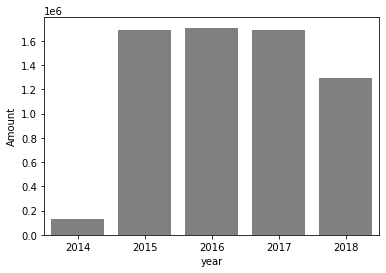

In [25]:
sns.barplot(data=yearly,x='year',y='Amount',color='Grey')

Count of transactions per year

<AxesSubplot:xlabel='year', ylabel='count'>

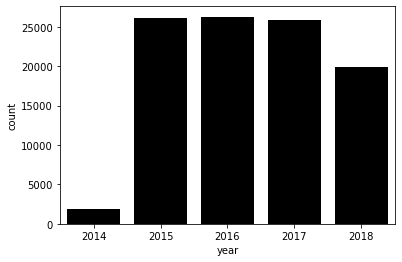

In [28]:
sns.countplot(data=cus,x='year',color='Black',)

In [29]:
cus['Date'].max()

Timestamp('2018-10-06 00:00:00')

taking the analysis date as 5 days after the last date on the dataset

In [30]:
end = cus['Date'].max() + dt.timedelta(5)
end

Timestamp('2018-10-11 00:00:00')

In [37]:
cus2 = cus.groupby('Customer',sort=True).agg({
    'Date':'max',
    'Transaction':'count',
    'Amount':'sum'
}).reset_index()

In [39]:
cus2.head()

,Customer,Date,Transaction,Amount
0,1,2018-08-06,15,937
1,2,2018-09-01,20,1390
2,3,2018-09-04,19,1337
3,4,2018-09-25,22,1549
4,5,2018-03-17,13,792


<AxesSubplot:>

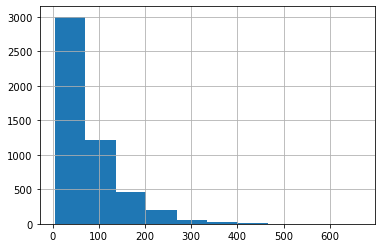

In [42]:
# number of days since last purchase
cus2['days_since_last_purchase'] = (end - cus2['Date']).dt.days
cus2['days_since_last_purchase'].hist()

<AxesSubplot:>

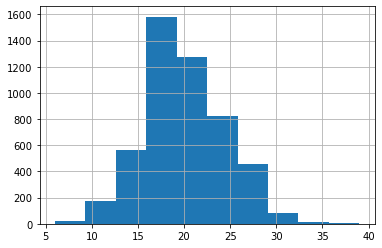

In [43]:
cus2['Transaction'].hist()

<AxesSubplot:>

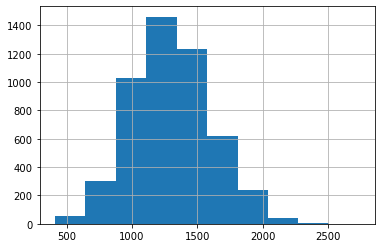

In [44]:
cus2['Amount'].hist()

In [46]:
cus2['avg_transaction_per_year'] = cus2['Transaction']/5

In [47]:
cus2.describe()

,Customer,Transaction,Amount,days_since_last_purchase,avg_transaction_per_year
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.000000,1301.788000,75.084000,4.000000
std,1443.520003,4.429935,305.022427,70.011885,0.885987
min,1.000000,6.000000,410.000000,5.000000,1.200000
25%,1250.750000,17.000000,1087.000000,24.000000,3.400000
50%,2500.500000,20.000000,1288.000000,53.000000,4.000000
75%,3750.250000,23.000000,1503.000000,104.000000,4.600000
max,5000.000000,39.000000,2738.000000,664.000000,7.800000


Range

- Recency 5days to 1000days
- Frequency 0 to 10 transactions per year
- Monetary  #400 to #3000 spent

In [48]:
recency_bin = [0,90,180,365,500,1000]
frequency_bin = [0,2,4,6,8,10]
monetary_bin = [0,400,1500,2000,2500,3000]

In [57]:
cus2['recency_score'] = pd.cut(cus2['days_since_last_purchase'], bins = recency_bin, labels = ['5','4','3','2','1'])
cus2['frequency_score'] = pd.cut(cus2['avg_transaction_per_year'], bins = frequency_bin, labels = ['1','2','3','4','5'])
cus2['monetary_score'] = pd.cut(cus2['Amount'], bins = monetary_bin, labels = ['1','2','3','4','5'])
cus2.head()

,Customer,Date,Transaction,Amount,days_since_last_purchase,avg_transaction_per_year,recency_score,frequency_score,monetary_score
0,1,2018-08-06,15,937,66,3.0,5,2,2
1,2,2018-09-01,20,1390,40,4.0,5,2,2
2,3,2018-09-04,19,1337,37,3.8,5,2,2
3,4,2018-09-25,22,1549,16,4.4,5,3,3
4,5,2018-03-17,13,792,208,2.6,3,2,2


In [58]:
# string the recency, frequency, and monetary columns together to create the RFM score

cus2['recency_score'].astype(str) + cus2['frequency_score'].astype(str) + cus2['monetary_score'].astype(str)

0       522
1       522
2       522
3       533
4       322
       ... 
4995    522
4996    432
4997    222
4998    522
4999    332
Length: 5000, dtype: object

In [61]:
cus2['recency_score'].str.cat(cus2[['frequency_score','monetary_score']])

0       522
1       522
2       522
3       533
4       322
       ... 
4995    522
4996    432
4997    222
4998    522
4999    332
Name: recency_score, Length: 5000, dtype: object

In [62]:
cus2['RFM_score'] = cus2['recency_score'].str.cat(cus2[['frequency_score','monetary_score']])
cus2.head()

,Customer,Date,Transaction,Amount,days_since_last_purchase,avg_transaction_per_year,recency_score,frequency_score,monetary_score,RFM_score
0,1,2018-08-06,15,937,66,3.0,5,2,2,522
1,2,2018-09-01,20,1390,40,4.0,5,2,2,522
2,3,2018-09-04,19,1337,37,3.8,5,2,2,522
3,4,2018-09-25,22,1549,16,4.4,5,3,3,533
4,5,2018-03-17,13,792,208,2.6,3,2,2,322


The good five and Lost

Champions: Bought the most recent, frequent, and have spent the most money

Loyal Customers: Spend a good amount of money, and do so frequently

Potential Loyalist: New customers that have spent more than average and done so more than once

Recent customers: Have bought very recently, but not frequently

Promising: New customers that haven't spent much, likely to be first order

Lost: Bring back with promotions

- '522' - Most recent, buys less frequently, spends less moderately - Recent Customers
- '532' - Most recent, buys frequently on the average, spends less moderately - Recent Customers
- '533' - Most recent, buys frequently on the average, spends moderately - Potential Loyalist
- '322' - Bought within the last one year, buys less frequently, and spends low - Bring them with promotion
- '422' - Bought within the last 6 months, buys less frequnetly, and spends low - Can't Loose/Promising
- '432' - Bought within the last 6 months, buys frequently on the average, spends low - Can't Loose/Promising
- '312' - Bought within the last one year, buys only once a year, and spends low - Bring them with promotion
- '444' - Bought within the last 6 months, buys frequently, and spends high - Loyal
- '433' - Bought within the last 6 months, buys frequently on the average, and spends moderately - Potential Loyalist
- '512' - Most recent, comes once a year, and spends low - Can't Loose/Promising
- '332' - Bought within the last one year, buys frequently on the average, and spends low - Can't Loose/Promising
- '412' - Bought within the last 6 months, comes once a year, spends low - Bring them with promotion
- '543' - Most recent, buys frequently, and spends moderately - Loyal
- '333' - Bought within the last one year, buys frequently on the average, and spends moderately - Can't Loose/Promising
- '222' - Bought in the last 2 years, comes less frequently, and spends low - Bring them with promotion
- '434' - Bought within the last 6 months, buys frequently on the average, and a big spender - Loyal
- '544' - Most recent, comes frequent than the normal, and spends big - Champions
- '523' - Most recent, comes less frequent that normal, and spends moderately - Potential
- '443' - Bought within the last 6 months, comes frequent than normal, and spends moderately - Loyalist
- '212' - Bought in the last one year, comes once a year, and spends low - Bring them with promotion
- '534' - Most recent, comes frequently on the average, big spender - Loyalist
- '423' - Bought in the last 6 months, comes less than frequent, and spends moderately - Recent customers
- '344' - Bought in the last one year, comes frequent than normal, and spends big - Potential Loyalist
- '232' - Bought in the last 2 years, comes frequently, and spends low - Bring them with promotion
- '122' - Bought in the last 3 years or more, comes less than frequent, and spends low - Bring back with promotion
- '545' - Most recent, comes more frequent than normal, and the biggest spender - Champions
- '112' - Bought in the last 3 years or more, comes once a year, spends low - Bring back with promotion

In [67]:
conditions = [(cus2['RFM_score'].str.contains('322|312|222|412|212|232|122|112')),
              (cus2['RFM_score'].str.contains('522|532|423')),
              (cus2['RFM_score'].str.contains('422|432|512|332|333')),
              (cus2['RFM_score'].str.contains('533|433|344|523')),
              (cus2['RFM_score'].str.contains('444|543|434|443|534')),
              (cus2['RFM_score'].str.contains('545|544'))]

segments = ['Lost','Recent Customer','Promising','Potential Loyalist','Loyal Customer','Champion']

In [68]:
cus2['segment'] = np.select(conditions,segments)
cus2.head()

,Customer,Date,Transaction,Amount,days_since_last_purchase,avg_transaction_per_year,recency_score,frequency_score,monetary_score,RFM_score,segment
0,1,2018-08-06,15,937,66,3.0,5,2,2,522,Recent Customer
1,2,2018-09-01,20,1390,40,4.0,5,2,2,522,Recent Customer
2,3,2018-09-04,19,1337,37,3.8,5,2,2,522,Recent Customer
3,4,2018-09-25,22,1549,16,4.4,5,3,3,533,Potential Loyalist
4,5,2018-03-17,13,792,208,2.6,3,2,2,322,Lost


In [81]:
segment = cus2.groupby('segment').agg(num_of_cus = ('Customer','count'),
                             count_of_trans = ('Transaction','sum'),
                             total_spending = ('Amount','sum')
                            ).reset_index()
segment

,segment,num_of_cus,count_of_trans,total_spending
0,Champion,32,1036,70259
1,Lost,333,5204,337413
2,Loyal Customer,45,1373,91759
3,Potential Loyalist,1150,28862,1924756
4,Promising,961,17606,1134292
5,Recent Customer,2479,45919,2950461


In [96]:
segment['pct_of_seg'] = segment['num_of_cus']/segment['num_of_cus'].sum()

segment.style.format({'pct_of_seg':'{:.1%}'})

,segment,num_of_cus,count_of_trans,total_spending,pct_of_seg
0,Champion,32,1036,70259,0.6%
1,Lost,333,5204,337413,6.7%
2,Loyal Customer,45,1373,91759,0.9%
3,Potential Loyalist,1150,28862,1924756,23.0%
4,Promising,961,17606,1134292,19.2%
5,Recent Customer,2479,45919,2950461,49.6%


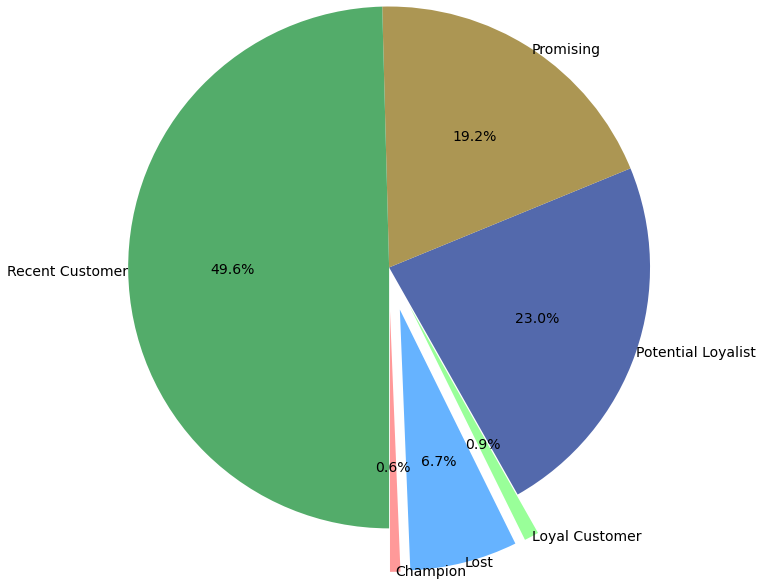

In [160]:
x = segment['num_of_cus']
labels = segment['segment']
colors = ['#ff9999','#66b3ff','#99ff99','#5369AC','#AC9653','#53AC6A']
explode = [0.5, 0.5, 0.5, 0, 0, 0]

#plt.figure(figsize=(15,10))

fig, ax = plt.subplots()
ax.pie(x, labels = labels, radius = 3, autopct='%.1f%%', colors = colors, explode = explode, 
       textprops={'fontsize': 14}, startangle = 270, labeldistance=1)

#textprops=dict(color="w")
#ax.legend(wedges, ingredients,
          #title="Ingredients",
          #loc="center left",
          #bbox_to_anchor=(1, 0, 0.5, 1))

#ax.set_title('Customer Segments',loc='right')
#plt.title('Customer Segments')

plt.show()